In [1]:
import numpy as np
import tensorflow.compat.v1 as tf

# the order matters
tf.disable_v2_behavior()
tf.enable_eager_execution() 


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
learning_rate = 0.01
training_steps = 450
display_step = 150
log_step = 15

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167, 7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 2.827,3.465,1.65,2.904,2.42,2.94,1.3])

W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [3]:
def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

def run_optimization():
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    gradients = g.gradient(loss, [W, b])
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [4]:
history_W = []
history_b = []
for step in range(0, training_steps):
    run_optimization()
    
    if step % display_step == 0:
        # use tf.identity to make a copy
        history_W.append(tf.identity(W))
        history_b.append(tf.identity(b)) 
    
    if step % log_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 0, loss: 0.947166, W: 0.447241, b: -1.183544
step: 15, loss: 0.600848, W: 0.519659, b: -1.101369
step: 30, loss: 0.569414, W: 0.510063, b: -1.033338
step: 45, loss: 0.540191, W: 0.500811, b: -0.967743
step: 60, loss: 0.513023, W: 0.491890, b: -0.904496
step: 75, loss: 0.487765, W: 0.483288, b: -0.843514
step: 90, loss: 0.464284, W: 0.474994, b: -0.784715
step: 105, loss: 0.442454, W: 0.466997, b: -0.728021
step: 120, loss: 0.422159, W: 0.459287, b: -0.673357
step: 135, loss: 0.403291, W: 0.451852, b: -0.620650
step: 150, loss: 0.385750, W: 0.444684, b: -0.569830
step: 165, loss: 0.369443, W: 0.437772, b: -0.520830
step: 180, loss: 0.354282, W: 0.431108, b: -0.473584
step: 195, loss: 0.340188, W: 0.424683, b: -0.428029
step: 210, loss: 0.327084, W: 0.418487, b: -0.384106
step: 225, loss: 0.314902, W: 0.412513, b: -0.341755
step: 240, loss: 0.303577, W: 0.406754, b: -0.300920
step: 255, loss: 0.293048, W: 0.401200, b: -0.261547
step: 270, loss: 0.283260, W: 0.395845, b: -0.223584
s

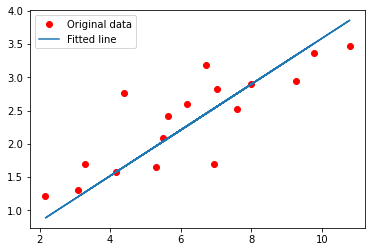

In [5]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

W: 0.4472409188747406, b: -1.1835441589355469
W: 0.44468405842781067, b: -0.5698301792144775
W: 0.38570377230644226, b: -0.15168651938438416
W: 0.3449696898460388, b: 0.1370997279882431


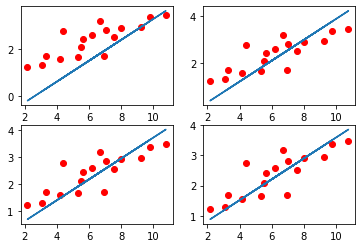

In [6]:
# Push the final result into history
history_W.append(tf.identity(W))
history_b.append(tf.identity(b))

fig, ax = plt.subplots(nrows=2, ncols=2)
idx = 0
for row in ax:
    for col in row:
        print(f"W: {history_W[idx]}, b: {history_b[idx]}")
        col.plot(X, Y, 'ro', label='Original data')
        col.plot(X, np.array(history_W[idx] * X + history_b[idx]), label='Fitted line')
        idx = idx + 1

plt.show()